In [1]:
import os
import pandas as pd

print("=" * 70)
print("GENERATING MANIFEST.CSV")
print("=" * 70)

# Data path
base_path = r'data_recordings'

print(f"\n Base path: {base_path}")

rows = []

print("\n Processing ACCEPTED...")
accepted_folder = os.path.join(base_path, 'accepted')
if os.path.exists(accepted_folder):
    for speaker_folder in os.listdir(accepted_folder):
        speaker_path = os.path.join(accepted_folder, speaker_folder)
        if os.path.isdir(speaker_path):
            file_count = 0
            for file in os.listdir(speaker_path):
                if file.endswith(('.wav', '.mp3', '.flac')):
                    relative_path = os.path.join('accepted', speaker_folder, file)
                    rows.append({
                        'speaker_id': speaker_folder,
                        'path': relative_path,
                        'label': 1  # 1 = ACCEPTED
                    })
                    file_count += 1
            print(f"{speaker_folder}: {file_count} files")
else:
    print(f"Not found: {accepted_folder}")

print("\nProcessing REJECTED...")
rejected_folder = os.path.join(base_path, 'rejected')
if os.path.exists(rejected_folder):
    for speaker_folder in os.listdir(rejected_folder):
        speaker_path = os.path.join(rejected_folder, speaker_folder)
        if os.path.isdir(speaker_path):
            file_count = 0
            for file in os.listdir(speaker_path):
                if file.endswith(('.wav', '.mp3', '.flac')):
                    relative_path = os.path.join('rejected', speaker_folder, file)
                    rows.append({
                        'speaker_id': speaker_folder,
                        'path': relative_path,
                        'label': 0  # 0 = REJECTED
                    })
                    file_count += 1
            print(f"  {speaker_folder}: {file_count} files")
else:
    print(f" Not found: {rejected_folder}")

df = pd.DataFrame(rows)
manifest_file = os.path.join(base_path, 'manifest.csv')
df.to_csv(manifest_file, index=False)

print("\n" + "=" * 70)
print("MANIFEST GENERAED SUCCESFULLY")
print("=" * 70)
print(f"\nArchive: {manifest_file}")
print(f"Total archives: {len(df)}")
print(f"  • Accepted (label=1): {sum(df['label'] == 1)}")
print(f"  • Rejected (label=0): {sum(df['label'] == 0)}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nColumns: {df.columns.tolist()}")


GENERATING MANIFEST.CSV

 Base path: data_recordings

 Processing ACCEPTED...
p001: 242 files
p226: 276 files
p227: 303 files
p228: 274 files
p230: 287 files
p233: 296 files

Processing REJECTED...
  p231: 107 files
  p232: 96 files
  p236: 102 files
  p239: 99 files
  p243: 82 files
  p244: 97 files
  p250: 103 files
  p254: 90 files
  p256: 86 files
  p257: 103 files
  p258: 92 files
  p259: 91 files
  p267: 98 files
  p268: 92 files
  p269: 90 files
  p270: 86 files
  p273: 94 files
  p274: 91 files
  p276: 88 files
  p277: 89 files

MANIFEST GENERAED SUCCESFULLY

Archive: data_recordings\manifest.csv
Total archives: 3554
  • Accepted (label=1): 1678
  • Rejected (label=0): 1876

First 5 rows:
  speaker_id                        path  label
0       p001  accepted\p001\p001_001.wav      1
1       p001  accepted\p001\p001_002.wav      1
2       p001  accepted\p001\p001_003.wav      1
3       p001  accepted\p001\p001_004.wav      1
4       p001  accepted\p001\p001_005.wav      1

Colum

SPEAKER VERIFICATION - CNN WITH MEL-SPECTROGRAMS

Configuration:
  Base path: data_recordings
  Manifest: data_recordings\manifest.csv
  Max samples: All
  Split ratios (train/val/test): 0.7/0.15/0.15

VERIFYING FILES AND PATHS
Base folder found
Manifest found

STEP 1: LOADING DATA FROM MANIFEST.CSV

Total entries: 3554

First 5 rows:
  speaker_id                        path  label
0       p001  accepted\p001\p001_001.wav      1
1       p001  accepted\p001\p001_002.wav      1
2       p001  accepted\p001\p001_003.wav      1
3       p001  accepted\p001\p001_004.wav      1
4       p001  accepted\p001\p001_005.wav      1

Class distribution:
  Accepted: 1678
  Rejected: 1876

Number of unique speakers: 26
Sample speakers: ['p001' 'p226' 'p227' 'p228' 'p230' 'p233' 'p231' 'p232' 'p236' 'p239']

STEP 2: LOADING AUDIO FILES
  Processed 50/3554 files...
  Processed 100/3554 files...
  Processed 150/3554 files...
  Processed 200/3554 files...
  Processed 250/3554 files...
  Processed 300/3554 f

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 128, 130, 1)    │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 130, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 65, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 65, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 65, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,287,236 (16.35 MB)

 Trainable params: 4,287,233 (16.35 MB)

 Non-trainable params: 3 (16.00 B)

Epoch 1/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 107s 626ms/step - accuracy: 0.5179 - loss: 0.9123 - val_accuracy: 0.6165 - val_loss: 0.6454
Epoch 2/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 101s 649ms/step - accuracy: 0.6269 - loss: 0.6431 - val_accuracy: 0.7162 - val_loss: 0.5574
Epoch 3/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 135s 599ms/step - accuracy: 0.7375 - loss: 0.5042 - val_accuracy: 0.8609 - val_loss: 0.3487
Epoch 4/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 94s 603ms/step - accuracy: 0.8344 - loss: 0.3534 - val_accuracy: 0.9079 - val_loss: 0.2330
Epoch 5/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 66s 424ms/step - accuracy: 0.8955 - loss: 0.2581 - val_accuracy: 0.9117 - val_loss: 0.2034
Epoch 6/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 64s 409ms/step - accuracy: 0.9166 - loss: 0.1884 - val_accuracy: 0.9492 - val_loss: 0.1360
Epoch 7/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 66s 426ms/step - accuracy: 0.9392 - loss: 0.1595 - val_accuracy: 0.9605 - val_loss: 0.1100
Epoch 8/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 72s 461ms/step - accuracy: 0.9475 - loss

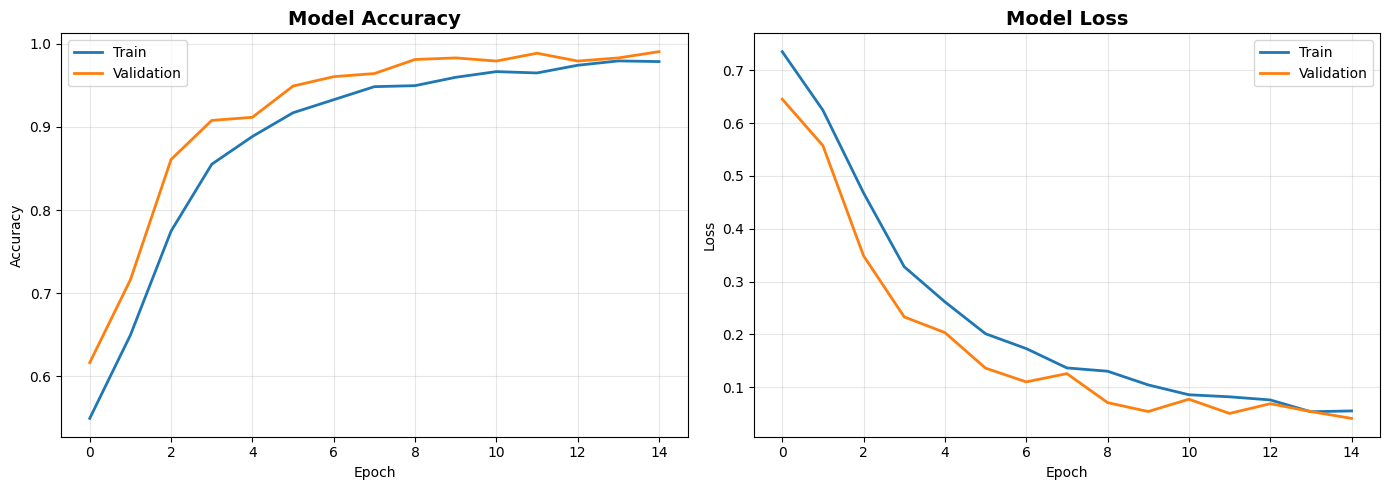

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 327ms/step

TEST ACCURACY: 96.27%

              precision    recall  f1-score   support

    Rejected       0.96      0.96      0.96       282
    Accepted       0.96      0.96      0.96       254

    accuracy                           0.96       536
   macro avg       0.96      0.96      0.96       536
weighted avg       0.96      0.96      0.96       536



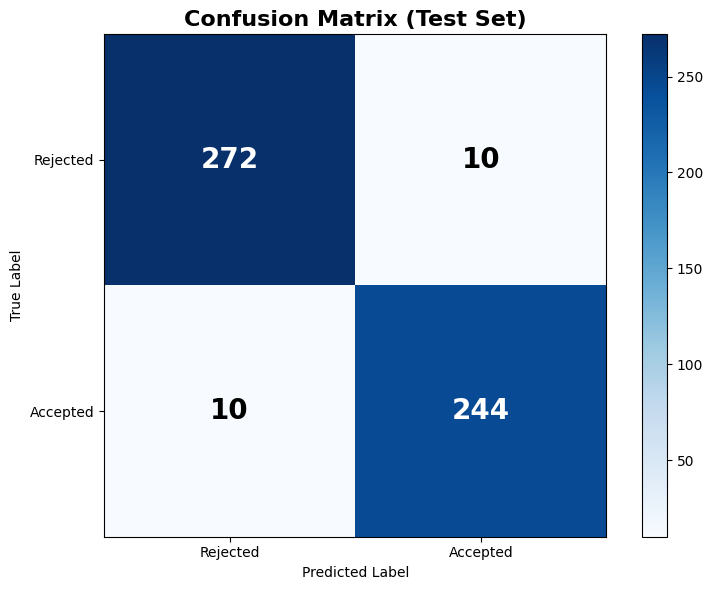


TRAINING COMPLETED SUCCESSFULLY!

Generated files:
  • training_history.png
  • confusion_matrix.png
  • test_results.csv
  • speaker_verification_model.h5


In [3]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split   # kept, though no longer used
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("SPEAKER VERIFICATION - CNN WITH MEL-SPECTROGRAMS")
print("=" * 70)

base_path = r'data_recordings'
manifest_path = os.path.join(base_path, 'manifest.csv')
MAX_SAMPLES = None

# ### Ratios for 3-way split
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15
RANDOM_STATE = 42

print(f"\nConfiguration:")
print(f"  Base path: {base_path}")
print(f"  Manifest: {manifest_path}")
print(f"  Max samples: {MAX_SAMPLES if MAX_SAMPLES else 'All'}")
print(f"  Split ratios (train/val/test): {TRAIN_RATIO}/{VAL_RATIO}/{TEST_RATIO}")

print("\n" + "=" * 70)
print("VERIFYING FILES AND PATHS")
print("=" * 70)

if not os.path.exists(base_path):
    raise FileNotFoundError(f"Base folder not found: {base_path}")

if not os.path.exists(manifest_path):
    print("\nPlease run first: python run_pipeline_to_get_data.py")
    raise FileNotFoundError("manifest.csv not found")

print("Base folder found")
print("Manifest found")

print("\n" + "=" * 70)
print("STEP 1: LOADING DATA FROM MANIFEST.CSV")
print("=" * 70)

df = pd.read_csv(manifest_path)
print(f"\nTotal entries: {len(df)}")

if MAX_SAMPLES:
    df = df.head(MAX_SAMPLES)

print(f"\nFirst 5 rows:")
print(df.head())

if 'path' not in df.columns or 'label' not in df.columns:
    raise ValueError("Incorrect manifest format")

print(f"\nClass distribution:")
print(f"  Accepted: {sum(df['label'] == 1)}")
print(f"  Rejected: {sum(df['label'] == 0)}")

# ### Extract speaker ID from the path
# Assumes something like: accepted/p001/file.wav  -> speaker 'p001'
df['speaker'] = df['path'].apply(lambda p: os.path.basename(os.path.dirname(p)))

print("\nNumber of unique speakers:", df['speaker'].nunique())
print("Sample speakers:", df['speaker'].unique()[:10])

def load_audio_file(file_path, base_folder, sr=22050, max_duration=3):
    full_path = os.path.join(base_folder, file_path)
    try:
        y, _ = librosa.load(full_path, sr=sr, duration=max_duration)
        y = y / (np.max(np.abs(y)) + 1e-6)
        y, _ = librosa.effects.trim(y, top_db=20)
        
        target_length = sr * max_duration
        if len(y) < target_length:
            y = np.pad(y, (0, target_length - len(y)))
        else:
            y = y[:target_length]
        return y
    except:
        return None

print("\n" + "=" * 70)
print("STEP 2: LOADING AUDIO FILES")
print("=" * 70)

audio_data = []
labels = []
speakers = []   # ### keep track of speaker for each loaded sample
failed = 0

for idx, row in df.iterrows():
    audio = load_audio_file(row['path'], base_path)
    if audio is not None:
        audio_data.append(audio)
        labels.append(row['label'])
        speakers.append(row['speaker'])
    else:
        failed += 1
    
    if (idx + 1) % 50 == 0:
        print(f"  Processed {idx + 1}/{len(df)} files...")

print(f"\nLoading completed: {len(audio_data)} files")
if failed > 0:
    print(f"Failed: {failed}")

if len(audio_data) == 0:
    raise ValueError("No data to train")

print("\n" + "=" * 70)
print("STEP 3: GENERATING MEL-SPECTROGRAMS")
print("=" * 70)

def audio_to_spectrogram(y, sr=22050, n_mels=128):
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=8000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db[..., np.newaxis]

spectrograms = []
for i, audio in enumerate(audio_data):
    spectrograms.append(audio_to_spectrogram(audio))
    if (i + 1) % 50 == 0:
        print(f"  Processed {i + 1}/{len(audio_data)} spectrograms...")

spectrograms = np.array(spectrograms)
labels = np.array(labels)
speakers = np.array(speakers)

print(f"\nSpectrograms shape: {spectrograms.shape}")

# 3-way split by speaker
def split_by_speaker(X, y, speakers,
                     train_ratio=0.7, val_ratio=0.15, test_ratio=0.15,
                     random_state=42):
    rng = np.random.RandomState(random_state)
    unique_speakers = np.unique(speakers)

    train_idx, val_idx, test_idx = [], [], []

    for spk in unique_speakers:
        spk_indices = np.where(speakers == spk)[0]
        rng.shuffle(spk_indices)
        n = len(spk_indices)

        n_train = int(round(train_ratio * n))
        n_val = int(round(val_ratio * n))
        n_test = n - n_train - n_val

        train_idx.extend(spk_indices[:n_train])
        val_idx.extend(spk_indices[n_train:n_train + n_val])
        test_idx.extend(spk_indices[n_train + n_val:])

    train_idx = np.array(train_idx)
    val_idx = np.array(val_idx)
    test_idx = np.array(test_idx)

    return (X[train_idx], X[val_idx], X[test_idx],
            y[train_idx], y[val_idx], y[test_idx])

X_train, X_val, X_test, y_train, y_val, y_test = split_by_speaker(
    spectrograms, labels, speakers,
    train_ratio=TRAIN_RATIO, val_ratio=VAL_RATIO, test_ratio=TEST_RATIO,
    random_state=RANDOM_STATE
)

print(f"\nFinal split sizes:")
print(f"  Train:      {X_train.shape[0]}")
print(f"  Validation: {X_val.shape[0]}")
print(f"  Test:       {X_test.shape[0]}")

print("\n" + "=" * 70)
print("STEP 4: BUILDING AND TRAINING CNN")
print("=" * 70)

norm_layer = layers.Normalization()
norm_layer.adapt(X_train)

def build_cnn_model(input_shape, norm):
    return models.Sequential([
        layers.Input(shape=input_shape),
        norm,
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

model = build_cnn_model(X_train.shape[1:], norm_layer)
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val), 
    epochs=15,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

print("\n" + "=" * 70)
print("STEP 5: EVALUATION AND RESULTS (ON TEST SET)")
print("=" * 70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['accuracy'], label='Train', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Train', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
plt.show()

y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTEST ACCURACY: {test_accuracy*100:.2f}%\n")
print(classification_report(y_test, y_test_pred, target_names=['Rejected', 'Accepted']))

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix (Test Set)', fontsize=16, fontweight='bold')
plt.colorbar()

classes = ['Rejected', 'Accepted']
plt.xticks([0, 1], classes)
plt.yticks([0, 1], classes)

thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=20, fontweight='bold')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

results_df = pd.DataFrame({
    'true_label': y_test,
    'predicted_label': y_test_pred,
    'confidence': y_test_pred_prob.flatten()
})
results_df.to_csv('test_results.csv', index=False)

model.save('speaker_verification_model.h5')

print("\n" + "=" * 70)
print("TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 70)
print("\nGenerated files:")
print("  • training_history.png")
print("  • confusion_matrix.png")
print("  • test_results.csv")
print("  • speaker_verification_model.h5")
